# Heart Heroes - Final Project Cogs 108


Overview

     The United States exhibits strong disparity in the socioeconomic status of its citizens. Socioeconomic status    has a great impact on a community’s standard of living; this involves social activity, interaction, and most importantly, health. Our group project attempts to find a relationship between poverty in the United States and the heart health of its citizens. 


## Introduction and Background

The issues of underserved and underprivileged communities suffering from the effects of poverty and unequal access is a universal problem. From proper nutrition, clean water sources, education and access to medication, lower tier groups from all stratified areas of socio-economic backgrounds take the brunt of the suffering. The evidence is heavily reflected in their overall health, and heart health is no exception. Data from 2016 reported by the Agency for Healthcare Research and Quality reports health-related disparities varying across the United States. States were ranked based on a ratio composed of number of healthcare encounters, years of potential life lost before age, leading causes of death, and personal care expenditures. [1] While people of all stretches of life exhibit flawed health, when it comes to heart health, people with lower standards of living conditions seem to suffer the most- a fact evinced by reliable medical indicators such as blood pressure. 

By tracking medical indicators such as blood pressure, one can prevent heart disease, stroke, or other cardiovascular diseases. [2] Appropriate cardiac care begins with the motivation to be and remain healthy. However, with constant stressors regarding finances, education, and health-care access, maintaining a healthy living style may not be a top priority. Even in cases where the initiative to be healthy may take place, there are communities which may not be educated on the consequences of their habits in regards to their cardiac care. Lack of funding in particular communities prevents those willing to help from actually making a difference to educate those underserved communities on better eating habits, the importance of exercise and the aftermath of not making heart healthy decisions. For the purpose of our project we define socio-economic status to be defined by race and poverty level and heart health to be determined by blood pressure and stroke. 

Non-profit organizations such as the American Heart Association promote healthy living by providing underserved communities with access to free events where people can learn about cardiac health. In some cases, they host events with other non-profit organizations to together provide the public with information that may help them reduce stress, manage their blood pressure, learn about free healthcare programs, etc. A particular program that the American Heart Association started is one where people have access to a system where they can record their own blood pressure and be able to track it over time. The system is set up on the spot using a beta-modeled mobile blood pressure kit that records their blood pressure and allows them to log back in from home or wherever they have access to the web. The program is called Check.Change.Control.[3] Even though it is still in its beta-testing stages, plenty of success has been achieved through realizing that people do in fact want to be healthy and make healthy choices but are sometimes not presented with the opportunity. [2, 4]

References:

https://www.ahrq.gov/research/findings/nhqrdr/nhqdr16/overview.html
https://www.healthypeople.gov/2020/topics-objectives/topic/heart-disease-and-stroke
https://www.heart.org/en/health-topics/high-blood-pressure/find-high-blood-pressure-tools--resources/check-change-icontroli-community-partner-resources
https://www.heart.org/en/healthy-living/healthy-lifestyle/how-to-help-prevent-heart-disease-at-any-age


## Group Member Contributions:

Catherine Lin:
Diana Moninola:
Milena Asiryan:
Nimisha Devanagondi:

Group Members PIDs
A12820693
A12165892
A########
A14559110


## Reseach Question
Is there a correlation between factors of socio-economic and racial background with increased blood pressure in the United States? 

## Hypothesis
Null Hypothesis:
H₀: There is no correlation between factors of poverty and racial background with increased blood pressure in the United States.

Alternative Hypothesis:
Hₐ: There is a correlation between factors of poverty and racial background with increased blood pressure in the United States. 

## Datasets


## Setup:

In [1]:
#Imports

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
from scipy.stats import ttest_ind, chisquare, normaltest
from statistics import mean


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Cleaning:

###### Reading csv files and building main dataframe:

In [2]:
#Reading csv files to dataframe

df_Nat = pd.read_csv('DEMOGRAPHICS.csv')

##select all countys in CA
##grab all columns relevant for variables we want
df_Nat = df_Nat.iloc[:, [2,3,8,14,29,32,35,38,41]]


In [3]:
##get two more variables (stroke and community health centers)
df_chc = pd.read_csv('RISKFACTORSANDACCESSTOCARE.csv')
df_chc= df_chc.iloc[:,[15]]


##joing data frames together
df_Nat = df_Nat.join(df_chc, rsuffix='_df_chc')
                                                  
##stroke
df_stroke = pd.read_csv('MEASURESOFBIRTHANDDEATH.csv')
df_stroke = df_stroke.iloc[:,[120]]

##join strok to main 
df_Nat = df_Nat.join(df_stroke, rsuffix='_df_stroke')





To get an initial feel of the data we are working with, we wanted to plot a Densityplot. Looking at a plot of our data would determine if any rows need to be dropped or if we have any outliers in our data. 

    Race data visualization:

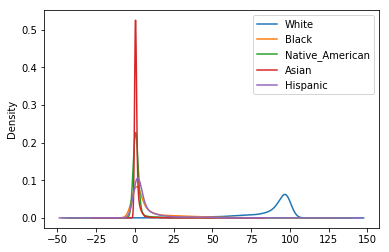

In [4]:

df_Nat[['White', 'Black','Native_American', 'Asian','Hispanic']].plot.kde()
plt.show()

    Population size, Poverty, Stroke, & High Blood Pressure visualization:

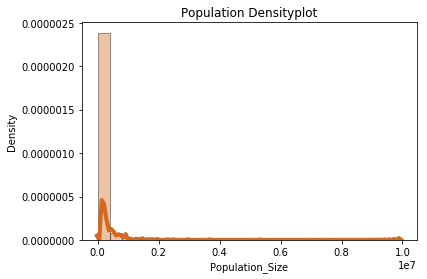

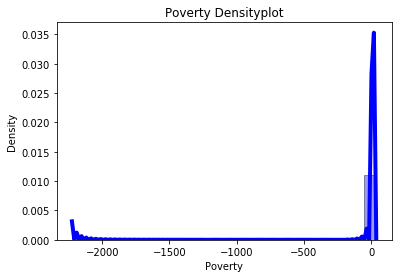

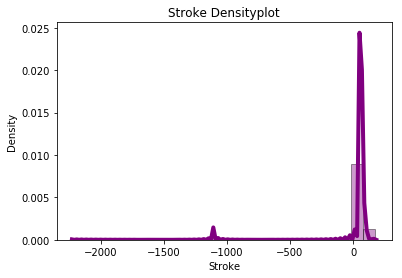

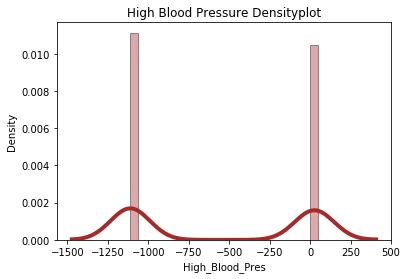

In [5]:
ax_popsize= sns.distplot(df_Nat['Population_Size'], hist=True, kde=True, 
             bins=25, color = 'chocolate', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax_popsize.set_ylabel('Density')
ax_popsize.set_title('Population Densityplot')
plt.show()

# Poverty 
ax_poverty = sns.distplot(df_Nat['Poverty'], hist=True, kde=True, 
             bins=25, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax_poverty.set_ylabel('Density')
ax_poverty.set_title('Poverty Densityplot')
plt.show()

#Stroke

ax_stroke= sns.distplot(df_Nat['Stroke'], hist=True, kde=True, 
             bins=25, color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax_stroke.set_ylabel('Density')
ax_stroke.set_title('Stroke Densityplot')
plt.show()

#High Blood Pressure
ax_hbp= sns.distplot(df_Nat['High_Blood_Pres'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax_hbp.set_ylabel('Density')
ax_hbp.set_title('High Blood Pressure Densityplot')
plt.show()

##### Cleaning main dataframe (df_Nat):

We noticed -1111.1 values in two of our columns (Stroke and High Blood Pressure) which did not make logical sense, so we determined that those rows needed to be dropped.  

In [6]:
##drop any numbers that do not make logical sense

# drop any rows with null (-1111.1) in the stroke column
df_Nat= df_Nat[df_Nat.Stroke!=-1111.1]
# drop any rows with null (-1111.1) in the high blood pressure column
df_Nat= df_Nat[df_Nat.High_Blood_Pres!=-1111.1]
#drop nan
df_Nat = df_Nat.dropna(how='any')



We replotted the Stroke and High Blood Pressure densityplots above and noticed that the stroke column still had odd values in it despite dropping those rows, which are contributing to the off-shape of the graph. On the other hand, it looked like the High Blood Pressure distribution looks normal after dropping the -1111.1 rows

    Updated Poverty Densityplot:

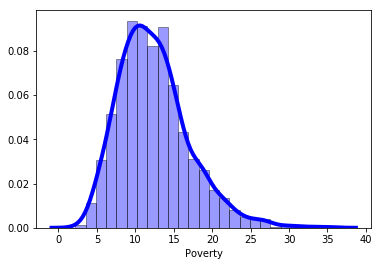

In [7]:
sns.distplot(df_Nat['Poverty'], hist=True, kde=True, 
             bins=25, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

     Updated Stroke Densityplot:

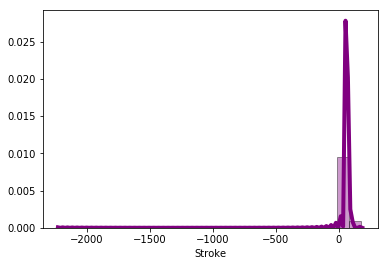

In [8]:
sns.distplot(df_Nat['Stroke'], hist=True, kde=True, 
             bins=25, color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()



    Updated Blood Pressure Densityplot:

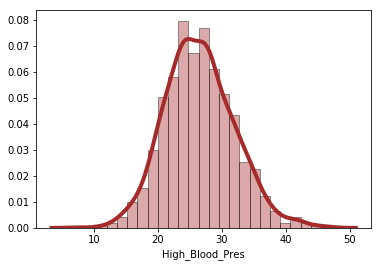

In [9]:
sns.distplot(df_Nat['High_Blood_Pres'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [10]:
# drop all negative values
for cols in df_Nat.columns.tolist()[2:]:
    df_Nat = df_Nat.loc[df_Nat[cols] > 0]

Final Stroke Desnityplot: 
    
    Dropping the negative values definitely helped clean our data up.

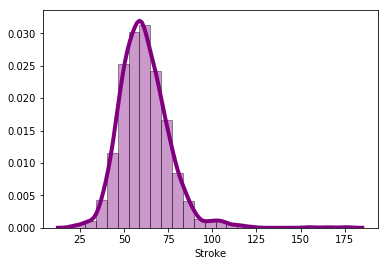

In [11]:
sns.distplot(df_Nat['Stroke'], hist=True, kde=True, 
             bins=25, color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

##### This is our final, cleaned data frame:

In [12]:
df_Nat

,CHSI_County_Name,CHSI_State_Name,Population_Size,Poverty,White,Black,Native_American,Asian,Hispanic,High_Blood_Pres,Stroke
0,Autauga,Alabama,48612,10.4,80.7,17.3,0.5,0.6,1.7,29.1,73.9
1,Baldwin,Alabama,162586,10.2,88.4,9.9,0.5,0.4,2.3,30.5,48.7
7,Calhoun,Alabama,112141,16.4,78.3,19.7,0.4,0.8,2.0,33.2,79.2
10,Chilton,Alabama,41744,14.9,88.3,10.5,0.3,0.4,3.7,26.5,70.3
15,Coffee,Alabama,45567,13.7,77.9,18.5,0.9,1.2,3.2,31.3,60.7
21,Cullman,Alabama,79886,13.3,97.3,1.2,0.4,0.3,3.1,35.0,71.1
24,DeKalb,Alabama,67271,15.1,96.0,1.8,0.8,0.3,8.8,35.3,58.6
25,Elmore,Alabama,73937,12.5,77.3,20.7,0.4,0.5,1.7,23.0,60.4
27,Etowah,Alabama,103189,15.7,83.8,14.6,0.3,0.5,2.4,38.2,63.5
34,Houston,Alabama,94249,15.3,72.2,25.9,0.4,0.7,1.6,34.0,55.8


## Data Analysis:

Now we are doing a descriptive analysis to get a feel of the typical values for the variables of our interest.

#### Average, Maximum, and Minimum measures

In [13]:
# Poverty descriptive analysis
nat_poverty_avg = mean(df_Nat['Poverty'])
print("National poverty average:" , nat_poverty_avg)
max_pov= df_Nat['Poverty'].max()
print("Maximum poverty:" , max_pov)
min_pov= df_Nat['Poverty'].min()
print("Minimum poverty:" , min_pov)

National poverty average: 12.384110885733604
Maximum poverty: 35.6
Minimum poverty: 2.2


In [14]:
# High blood pressure descriptive analysis
nat_hbp_avg = mean(df_Nat['High_Blood_Pres'])
print("National high blood pressure:" , nat_hbp_avg)
max_hbp= df_Nat['High_Blood_Pres'].max()
print("Maximum high blood pressure:" , max_hbp)
min_hbp= df_Nat['High_Blood_Pres'].min()
print("Minimum high blood pressure:" , min_hbp)

National high blood pressure: 26.473225152129817
Maximum high blood pressure: 47.1
Minimum high blood pressure: 7.2


In [15]:
# Race descriptive analysis
nat_white_avg = mean(df_Nat['White'])
print("National white average:" , nat_white_avg)
max_white= df_Nat['White'].max()
print("Maximum white:" , max_white)
min_white= df_Nat['White'].min()
print("Minimum white:" , min_white)

nat_Black_avg = mean(df_Nat['Black'])
print("National Black average:" , nat_Black_avg)
max_Black= df_Nat['Black'].max()
print("Maximum Black:" , max_Black)
min_Black= df_Nat['Black'].min()
print("Minimum Black:" , min_Black)

nat_Asian_avg = mean(df_Nat['Asian'])
print("National Asian average:" , nat_Asian_avg)
max_Asian= df_Nat['Asian'].max()
print("Maximum Asian:" , max_Asian)
min_Asian= df_Nat['Asian'].min()
print("Minimum Asian:" , min_Asian)

nat_Native_American_avg = mean(df_Nat['Native_American'])
print("National Native_American average:" , nat_Native_American_avg)
max_Native_American= df_Nat['Native_American'].max()
print("Maximum Native_American:" , max_Native_American)
min_Native_American= df_Nat['Native_American'].min()
print("Minimum Native_American:" , min_Native_American)

nat_Hispanic_avg = mean(df_Nat['Hispanic'])
print("National Hispanic average:" , nat_Hispanic_avg)
max_Hispanic= df_Nat['Hispanic'].max()
print("Maximum Hispanic:" , max_Hispanic)
min_Hispanic= df_Nat['Hispanic'].min()
print("Minimum Hispanic:" , min_Hispanic)

National white average: 86.52515212981744
Maximum white: 99.7
Minimum white: 6.7
National Black average: 8.405882352941177
Maximum Black: 78.6
Minimum Black: 0.1
National Asian average: 1.7098039215686274
Maximum Asian: 55.1
Minimum Asian: 0.1
National Native_American average: 2.1311020960108182
Maximum Native_American: 91.8
Minimum Native_American: 0.1
National Hispanic average: 6.779513184584179
Maximum Hispanic: 94.8
Minimum Hispanic: 0.3


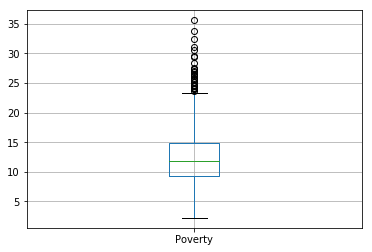

In [16]:
poverty_boxplot= df_Nat.boxplot(column= 'Poverty')

#### Correlation analysis: Scatter matrix to see which variables could be correlated 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


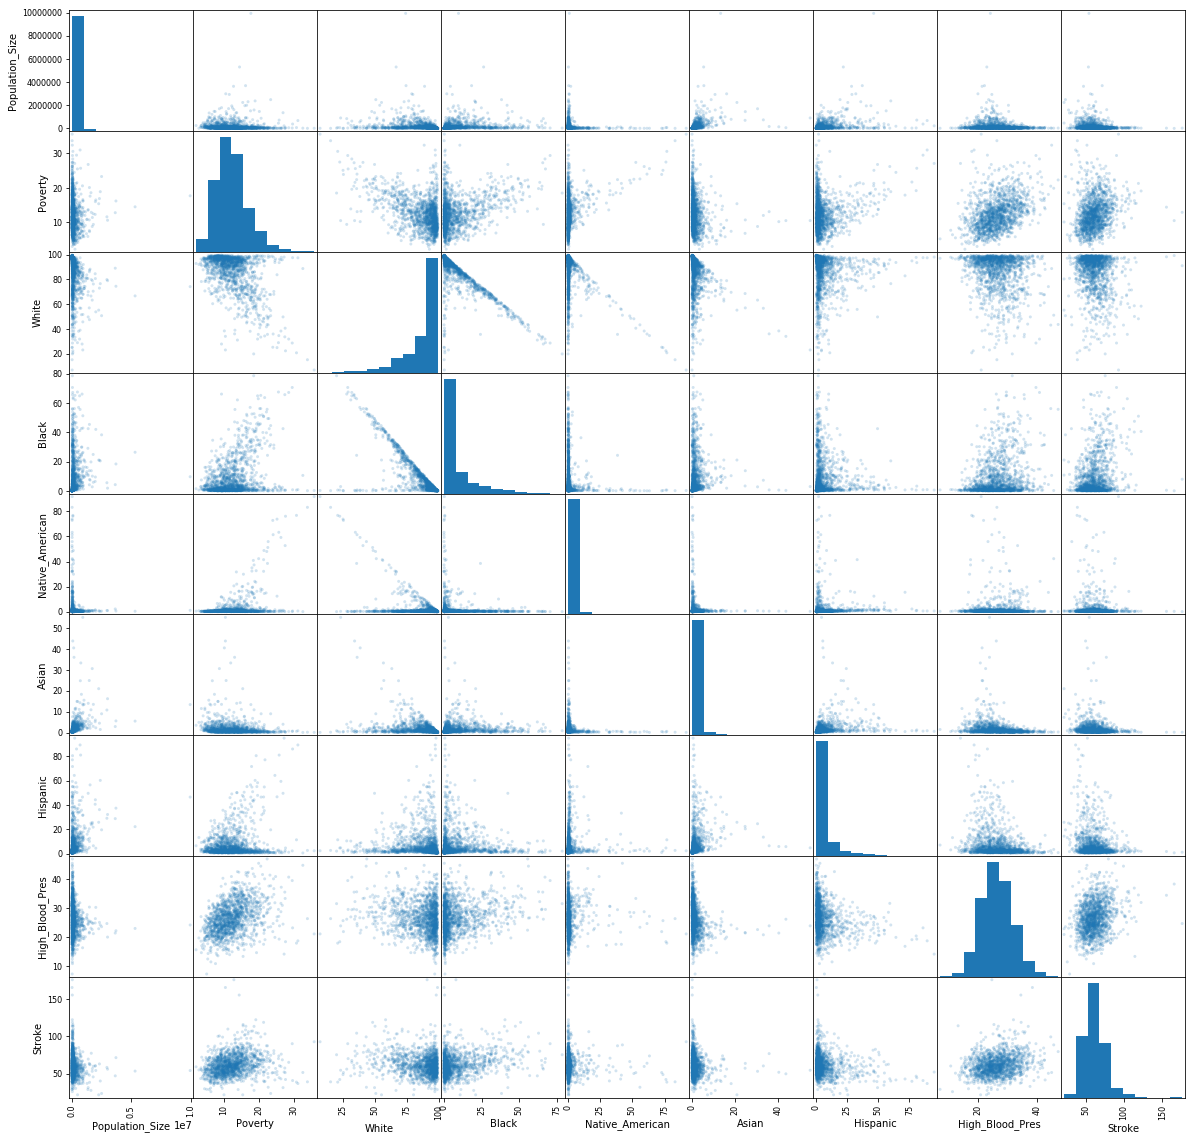

In [17]:
fig = pd.scatter_matrix(df_Nat, alpha=0.2, figsize= (20,20))

This scatter matrix shows a scatter plot for each variable against each other. From this plot, we are able to see that there might be a correlation between county Poverty and High Blood Pressure levels, high blood pressure and strokes,and poverty and strokes. 

Text(0, 0.5, 'High Blood Pressure')

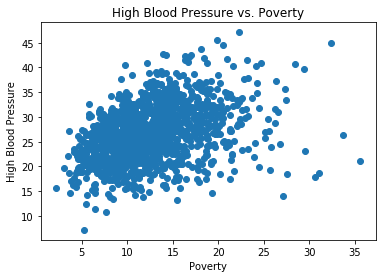

In [18]:
plt.scatter(df_Nat['Poverty'],df_Nat['High_Blood_Pres'])
plt.title('High Blood Pressure vs. Poverty')
plt.xlabel('Poverty')
plt.ylabel('High Blood Pressure')

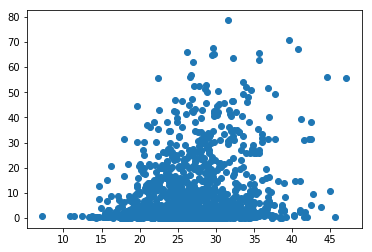

In [19]:
plt.scatter(df_Nat['High_Blood_Pres'],df_Nat['Black'])
#plt.title('High Blood Pressure vs. Poverty')
#plt.xlabel('High Blood Pressure')
#plt.ylabel('High Blood Pressure')

We wanted to zoom in to the high blood pressure and poverty plot, since that plot directly relates to our hypothesis. Below is our correlation table that is the numerical equivalent of the scatter matrix. This would be the equivalent to analyzing the data using a Pearson test for correlation. 

In [20]:
df_Nat.corr()

,Population_Size,Poverty,White,Black,Native_American,Asian,Hispanic,High_Blood_Pres,Stroke
Population_Size,1.000000,-0.007605,-0.202655,0.157545,-0.065191,0.394207,0.316643,-0.112749,-0.146474
Poverty,-0.007605,1.000000,-0.483668,0.365379,0.380730,-0.125272,0.210811,0.388188,0.224470
White,-0.202655,-0.483668,1.000000,-0.801691,-0.419245,-0.301154,-0.013013,-0.161134,-0.162099
Black,0.157545,0.365379,-0.801691,1.000000,-0.116098,0.055565,-0.051728,0.237514,0.249625
Native_American,-0.065191,0.380730,-0.419245,-0.116098,1.000000,-0.074380,0.008313,0.011236,-0.042710
Asian,0.394207,-0.125272,-0.301154,0.055565,-0.074380,1.000000,0.203314,-0.197106,-0.123732
Hispanic,0.316643,0.210811,-0.013013,-0.051728,0.008313,0.203314,1.000000,-0.212883,-0.174536
High_Blood_Pres,-0.112749,0.388188,-0.161134,0.237514,0.011236,-0.197106,-0.212883,1.000000,0.239481
Stroke,-0.146474,0.224470,-0.162099,0.249625,-0.042710,-0.123732,-0.174536,0.239481,1.000000


We see that there is a 0.388 correlation between High Blood Pressure and Poverty. There is a 0.224 correlation between Stroke and Poverty. Finally, there is a 0.239 correlation between High Blood Pressure and Stroke. 
According to guidelines on interpretting pearson correlation coefficients, we can state that we see a small positive correlation between stroke and poverty, and high blood pressure and stroke. There is also a medium positive correlation between high blood pressure and poverty. 

Even though there seems like there is a correlation between these variables, we want to run more tests before concluding anything. 

Using alpha value of 0.01, does poverty and race significantly predict high blood pressure?


#### Linear Regression test

In [21]:
outcome, predictors= patsy.dmatrices('Poverty~High_Blood_Pres', df_Nat)

In [22]:
mod= sm.OLS(outcome, predictors)

In [23]:
res= mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Poverty   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     262.1
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           2.20e-54
Time:                        00:54:08   Log-Likelihood:                -4226.0
No. Observations:                1479   AIC:                             8456.
Df Residuals:                    1477   BIC:                             8467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7036      0.547     

##CHECK With TA: For every 1 unit increase in high blood pressure percentage, you expect to see a 0.3279 unit increase in poverty percentage level by county.
If high blood pressure percentage were 0, the poverty percentage would be 3.7.

In [24]:
p_val = res.pvalues[1]
alpha = 0.01
#if p_val < alpha:
#    lm_1 = False
#if p_val > alpha:
#    lm_1 = True
#print(lm_1)
print(p_val)

2.1981677056e-54


Looking at our p-value, we can see that the p-value is smaller than our alpha value of 0.01. This allows us to reject the null hypothesis and establish a significant relationship between high blood pressure and poverty.

In [25]:
outcome, predictors= patsy.dmatrices('Black~High_Blood_Pres', df_Nat)
mod= sm.OLS(outcome, predictors)
res= mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Black   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     88.30
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           2.06e-20
Time:                        00:54:08   Log-Likelihood:                -5777.8
No. Observations:                1479   AIC:                         1.156e+04
Df Residuals:                    1477   BIC:                         1.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.9826      1.563     

In [26]:
outcome, predictors= patsy.dmatrices('White~High_Blood_Pres', df_Nat)
mod= sm.OLS(outcome, predictors)
res= mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  White   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     39.37
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           4.59e-10
Time:                        00:54:08   Log-Likelihood:                -6038.0
No. Observations:                1479   AIC:                         1.208e+04
Df Residuals:                    1477   BIC:                         1.209e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          97.9809      1.863     

In [27]:
outcome, predictors= patsy.dmatrices('Black~Native_American', df_Nat)
mod= sm.OLS(outcome, predictors)
res= mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Black   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     20.18
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           7.60e-06
Time:                        00:54:08   Log-Likelihood:                -5810.7
No. Observations:                1479   AIC:                         1.163e+04
Df Residuals:                    1477   BIC:                         1.164e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.8123      0.333     

#### T-test

In [28]:
# find averages 

#run test
t_val, p_val = ttest_ind(df_Nat['Poverty'],df_Nat['High_Blood_Pres'])
print(t_val)
print(p_val)

-76.4409183924
0.0


In [29]:
t_val, p_val = ttest_ind(df_Nat['Hispanic'],df_Nat['Native_American'])
print(t_val)
print(p_val)

13.6689839591
2.72761761414e-41


## Results:

## Ethics & Privacy:
Our data science question centers around individual’s healthcare and personal data. Therefore, privacy is a major concern regarding the datasets we are trying to use. Among our top concerns is individual confidentiality. In order to respect our data provider’s confidentiality, we will not disclose names or other specific identifiers in any of the csv files we analyze. 
The main data set we are looking to use is from the Centers for Disease and Control Prevention (CDC), which is a United States government agency. There are state level laws that make it mandatory for each state to report data about certain diseases. The analysis and information we want to uncover from the datasets will not pose any harm toward our data providers; rather, we will attempt to use the overall healthcare data and demographics to educate and inform the public about their wellbeing as well as the risks that could arise due to an unhealthy lifestyle. 

##### Data Collection
Because the data we analyze is from the databases previously compiled by the Centers for Disease Control and Prevention, we can assume that the CDC obtained this data from ethical practice and informed consent from the origins from which they abstracted the data. We personally did not use human subjects for this project, and obtained our data from an open and publicly provided source; therefore we had no need to seek informed consent. Regarding the issue of personally identifiable information, anonymization was not a concern because the values provided by the CDC came in pure number form and was completely anonymized. ICD-CM stands for International Classification of Diseases, Clinical Modification, and are codes used to categorize and identify health conditions. These codes take into account HIPPA, the Health Insurance Portability and Accountability Act. Therefore, the CDC safely masks patient confidentiality and anonymization. 
When it comes to collection bias, we considered sources of bias that could arise during data collection. In order to mitigate these potential biases, we took into consideration all possible causes of heart disease that came to mind and took out variables that were not as contributory to heart disease through thorough research of the variable itself. During the actual data collection processes, we chose to keep all numbers and statistics for the purpose of staying true to the data provided by the CDC. The only values that were discarded were those of negative value because they were not logically sound with the variable under scrutiny. This was the only area where we found the need to disregard irrelevant data for analysis, and we were sure to make a note of it during the entire analysis process to ensure that the discarded data was purposeful. 

###### Data Storage
The ethics and privacy of data storage such as the issues regarding a system data removal, data security, and data retention was of very little concern in this project. This is because, in terms of data security, the data that we used was obtained through a very open and public source with no need for any semblance of encryption or access control. Should an issue arise regarding an individual or organization’s request for personal information to be removed, or if the data is no longer relevant or needed, it is plausible to assume that the issue would be officially taken up with the CDC and their method of data storage.   

###### Analysis
When it comes to looking into statistics regarding socioeconomic backgrounds, it was important to keep in check missing perspectives and dataset bias in order to reflect honest representation of the subject. A potential assumption that we had to keep in check was our underlying hypothesis that people from lower socioeconomic backgrounds would have lower heart health, evinced from our background research. To remedy this, our data cleaning process keeps all data provided by the CDC in order to stay true to the original data, and, as stated before, only discarded data that was deemed illogical. Furthermore, to be thorough, we made sure to make a density plot of illogical data before discarding it in order to see how much of an impact was made by disregarding it from analysis. 


## Conclusion & Discussion: